# Results on the 100K movilens datasets

In [1]:
from alternating_least_square import AlternatingLeastSquare
import matplotlib.pyplot as plt

# create object and get the data

In [2]:
data_dir = '../data/ml-latest-small/ratings.csv'
als_100k_data = AlternatingLeastSquare(data_dir, embedding_dim=80)

In [3]:
als_100k_data.data_indexing()

## Plotting

### Power law

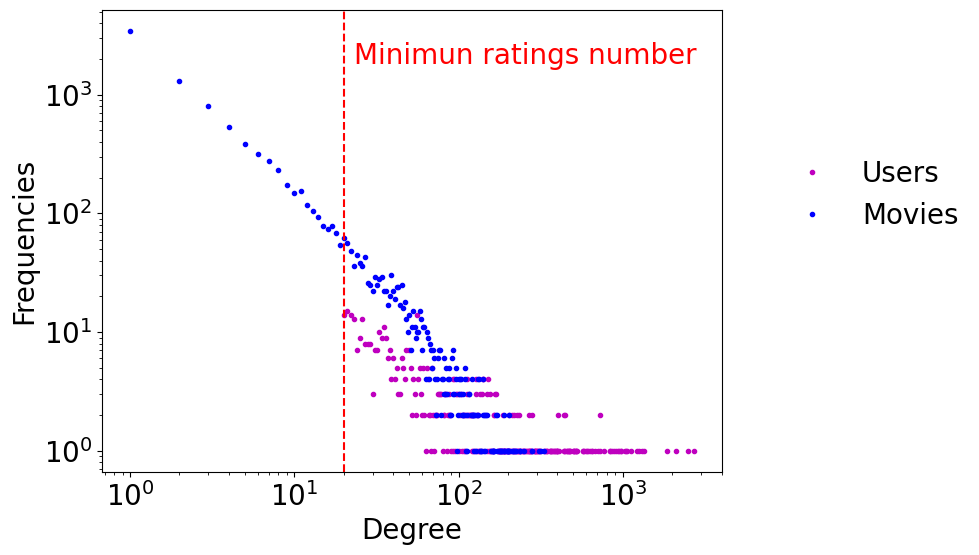

In [4]:
als_100k_data.plot_power_law("power_law_100k")

### Ratings distribution

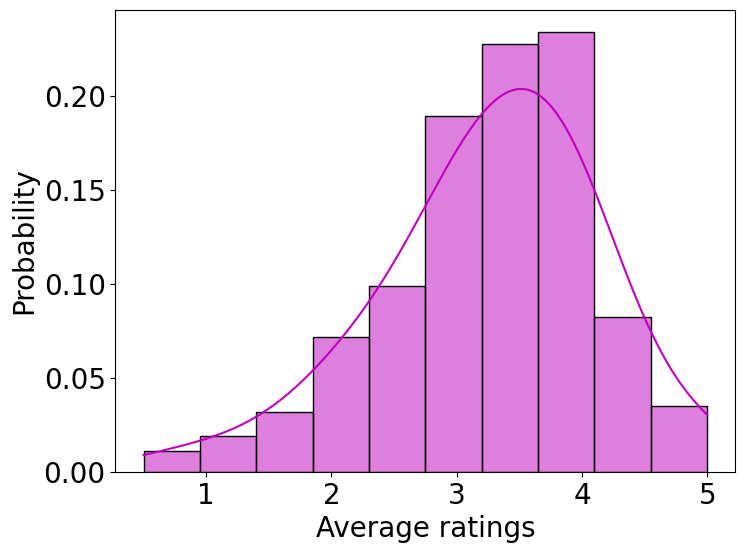

In [5]:
als_100k_data.plot_average_rating_hist("Ratings_100k")

## Train test split

In [6]:
als_100k_data.train_test_split()

## Run the model: biases + embeddings

In [7]:

user_biases, item_biases ,losses, rmse, losses_test, rmses_test= als_100k_data.alternating_least_square(als_100k_data.data_by_user_train, als_100k_data.data_by_movie_train, lambd=0.1, gamma=0.001, epochs = 100)

Training: 100%|██████████| 100/100 [03:07<00:00,  1.88s/epoch, test_rmse=0.968]


## Plot losses on training and test sets

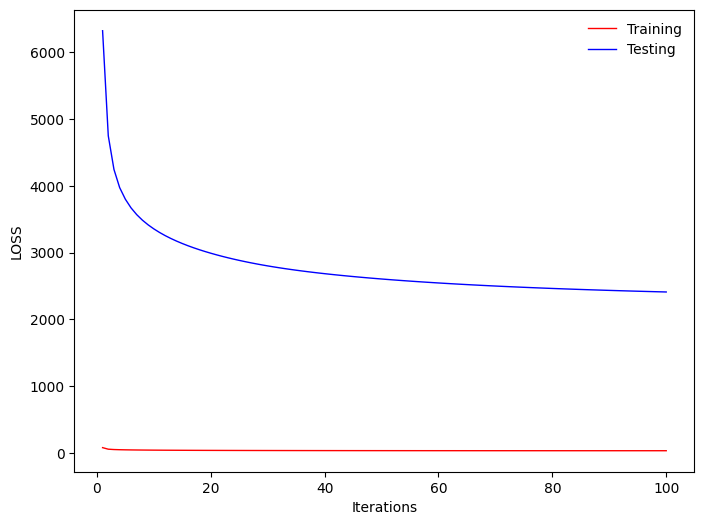

In [8]:
als_100k_data.line_plot(losses, losses_test, xaxis = "Iterations" , yaxis= "LOSS", fig_name = "losses_100k")


## On ly loss training

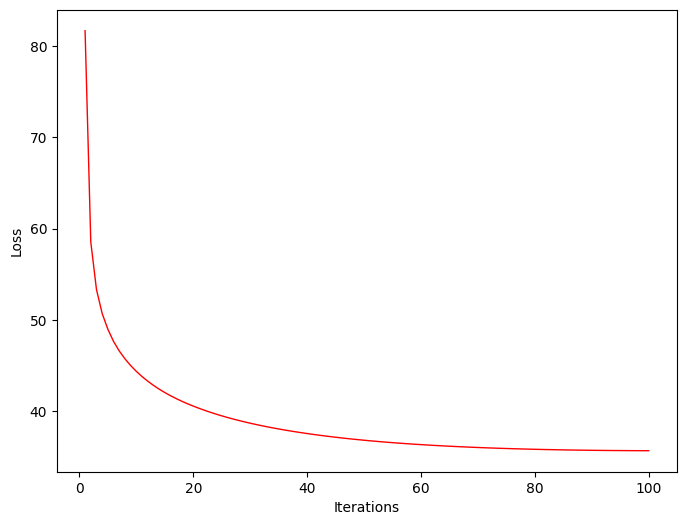

In [9]:
als_100k_data.plot_training_loss_only(losses,xaxis = "Iterations" , yaxis= "Loss", fig_name="loss_rain_100k")

## Optimal values for lambda 
gamma = 0.001

In [24]:
losses_list =[]
lambdas=[0.01, 0.1, 1, 5]
for lambd in lambdas:
    _, _ ,losses_train, _, _, _= als_100k_data.alternating_least_square(als_100k_data.data_by_user_train, als_100k_data.data_by_movie_train, lambd=lambd, gamma=0.001, epochs =5)
    losses_list.append(losses_train)

Training: 100%|██████████| 5/5 [00:09<00:00,  1.93s/epoch, test_rmse=2.13]


In [25]:
def plot_trainings_losses(losses_list, lambdas=[0.01, 0.1, 1, 5]):

    fig, ax = plt.subplots(figsize=(8,5))
    colors= [ "blue", "green", "red", "purple"]
    for i in range(len(losses_list)):
      ax.plot(range(1,len(losses_list[i])+1), losses_list[i], 
              color=colors[i], ls='-', lw=2, label = r"$\lambda $" + f" = {lambdas[i]}")

    ax.set_xlabel("Iterations")
    ax.set_ylabel("Loss")
    ax.legend(title="lambda",
                       bbox_to_anchor=(1.06, 0.3), loc="center left",  frameon=False)

    plt.show()


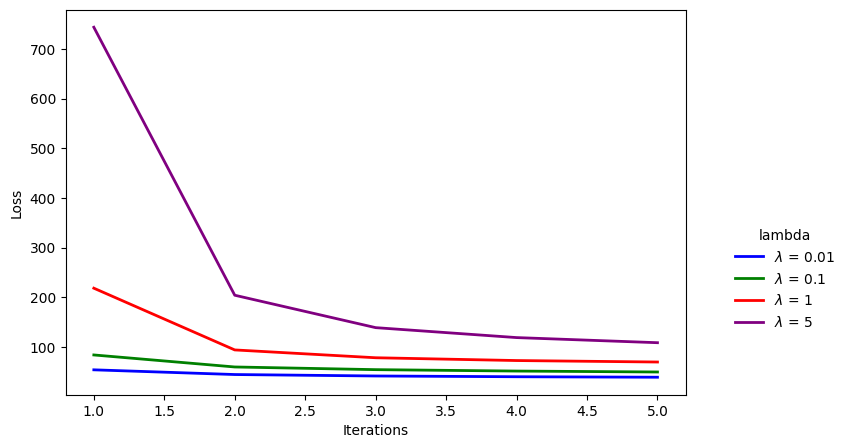

In [26]:
plot_trainings_losses(losses_list, lambdas=[0.01, 0.1, 1, 5])

## Optimal values for gamma
lamda = 0.1

In [27]:
losses_list =[]
gammas=[0.01, 0.1, 1, 5]
for gamma  in gammas:
    _, _ ,losses_train, _, _, _= als_100k_data.alternating_least_square(als_100k_data.data_by_user_train, als_100k_data.data_by_movie_train, lambd=0.1, gamma=gamma, epochs = 5)
    losses_list.append(losses_train)

Training: 100%|██████████| 5/5 [00:09<00:00,  1.85s/epoch, test_rmse=1.43]


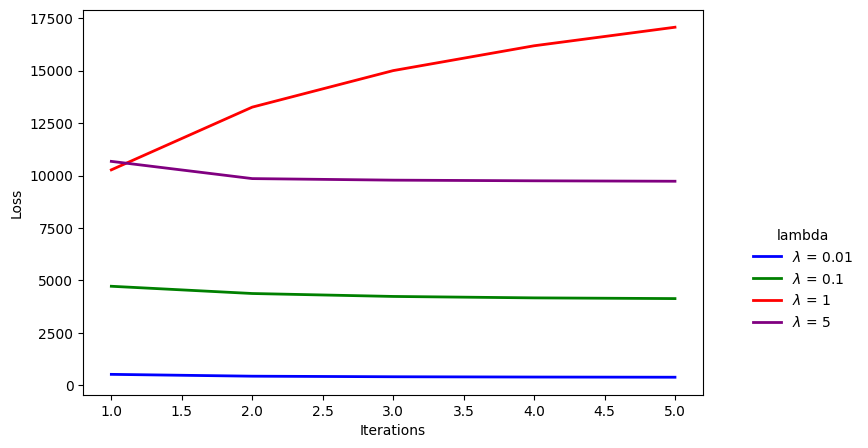

In [28]:
plot_trainings_losses(losses_list, lambdas=gammas)

## Plot RMSEs on training and test sets

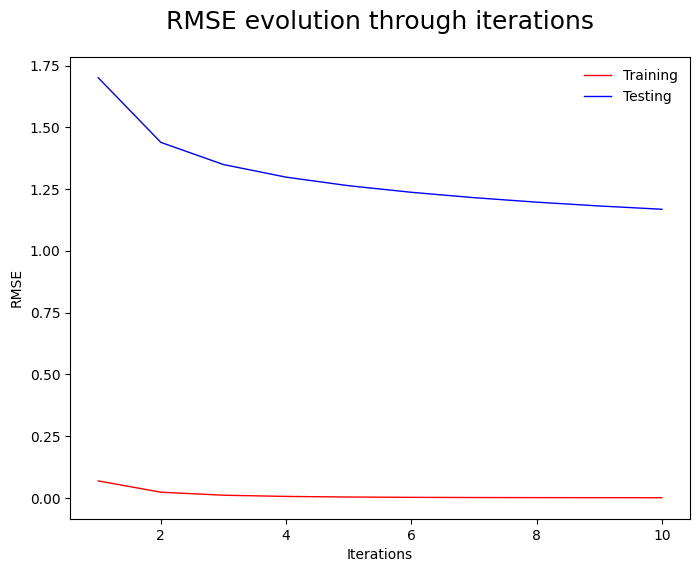

In [9]:
als_100k_data.line_plot(rmse, rmses_test, xaxis = "Iterations", yaxis = "RMSE", title="RMSE evolution through iterations")


## Identify the latents factor dimension

Training: 100%|██████████| 100/100 [02:59<00:00,  1.80s/epoch, test_rmse=0.964]


Text(0, 0.5, 'Test Rmses')

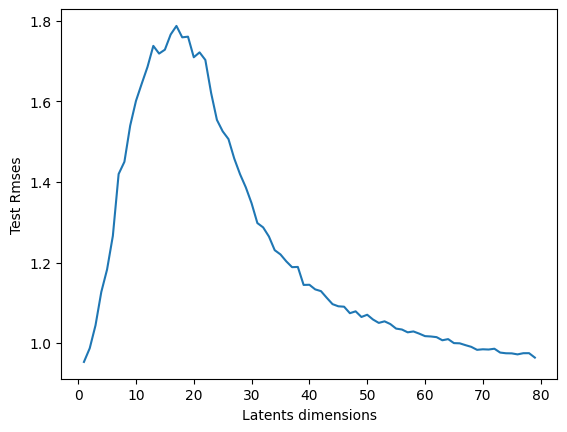

In [2]:
import numpy as np
import matplotlib.pyplot as plt

latents_dimensions = np.arange(1,80) 

data_dir = '../data/ml-latest-small/ratings.csv'
best_test_rmses = []
for latent_dimension in latents_dimensions :

    als_100k_data = AlternatingLeastSquare(data_dir, embedding_dim=latent_dimension)

    als_100k_data.train_test_split()
    _, _, _, _, _, rmses_test= als_100k_data.alternating_least_square(als_100k_data.data_by_user_train, als_100k_data.data_by_movie_train, lambd=0.1, gamma=0.001, epochs = 100)
    best_test_rmses.append(min(rmses_test))



plt.plot(latents_dimensions, best_test_rmses)
plt.xlabel("Latents dimensions")
plt.ylabel("Test Rmses")

## Recommendations for userId= 100

In [14]:
movies_dir = "../data/ml-latest-small/movies.csv"
als_100k_data.recommendation_for_user(movies_dir, user_id=13)

User 13 may also like:['Fargo (1996)', 'Monty Python and the Holy Grail (1975)', 'Indiana Jones and the Last Crusade (1989)', 'Men in Black (a.k.a. MIB) (1997)', 'Goonies, The (1985)']


# Results on the 25K movilens datasets

# create object and get the data

In [10]:

data_dir = '../data/ml-25m/ratings.csv'
als_25m_data = AlternatingLeastSquare(data_dir, embedding_dim=5)
als_25m_data.data_indexing()

## Plots

### Power law

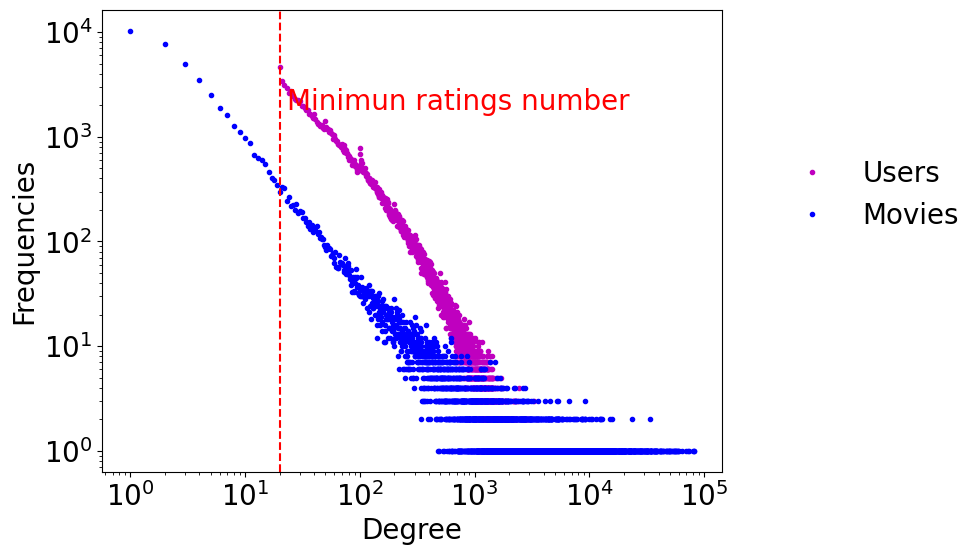

In [4]:
als_25m_data.plot_power_law("power_law_25m")

### Ratings distribution

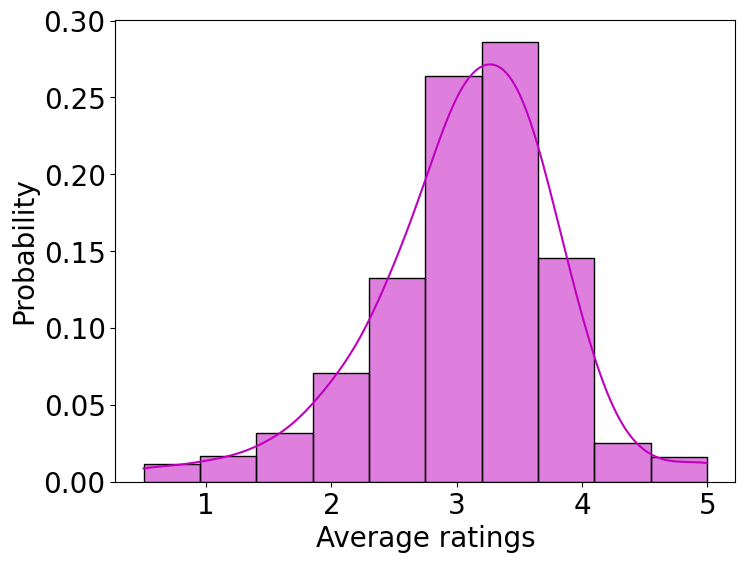

In [5]:

als_25m_data.plot_average_rating_hist("ratings_25m")

## Train test split

In [11]:

als_25m_data.train_test_split()

## Run the model: biases + embeddings

In [12]:
user_biases, item_biases ,losses, rmse, losses_test, rmses_test= als_25m_data.alternating_least_square(als_25m_data.data_by_user_train, als_25m_data.data_by_movie_train, lambd=0.1, gamma=0.001, epochs = 20)

Training:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training: 100%|██████████| 20/20 [43:27<00:00, 130.38s/epoch, test_rmse=0.855]


## Plot losses on training and test sets


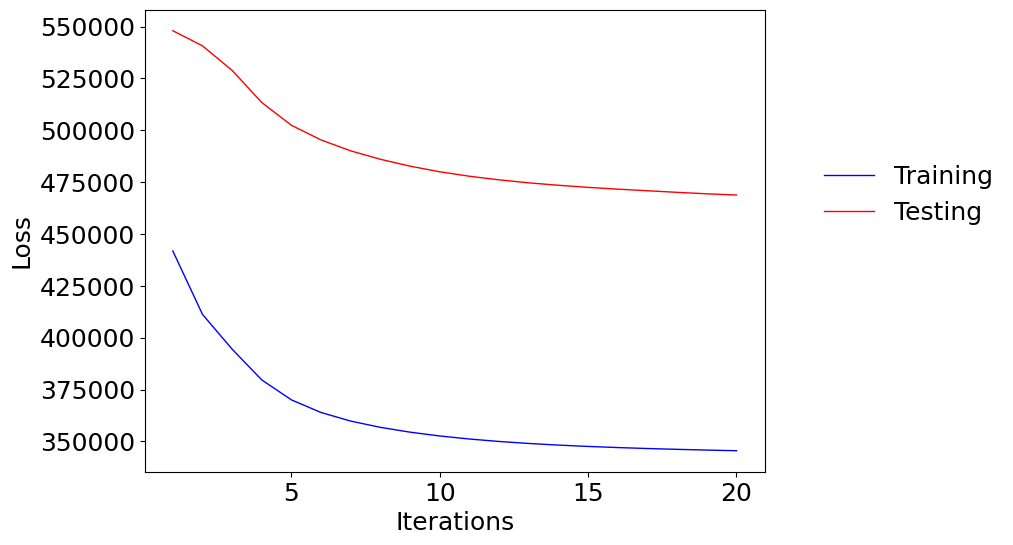

In [13]:
als_25m_data.line_plot(losses, losses_test, xaxis = "Iterations", yaxis = "Loss", fig_name="b+e_25m_loss_train_test")


## Plot RMSEs on training and test sets

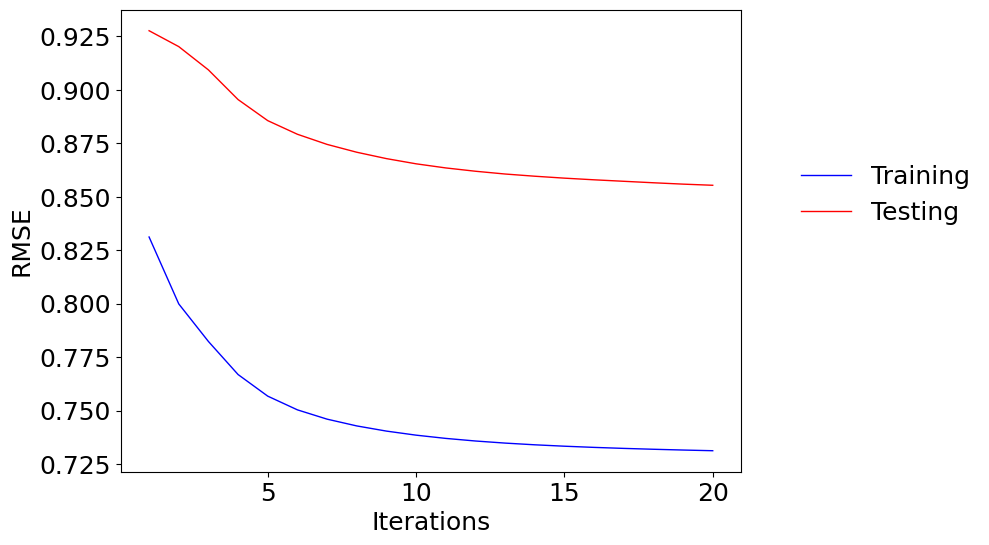

In [14]:

als_25m_data.line_plot(rmse, rmses_test, xaxis = "Iterations", yaxis = "RMSE",  fig_name="b+e_25m_rmse_train_test")


##  Training only loss

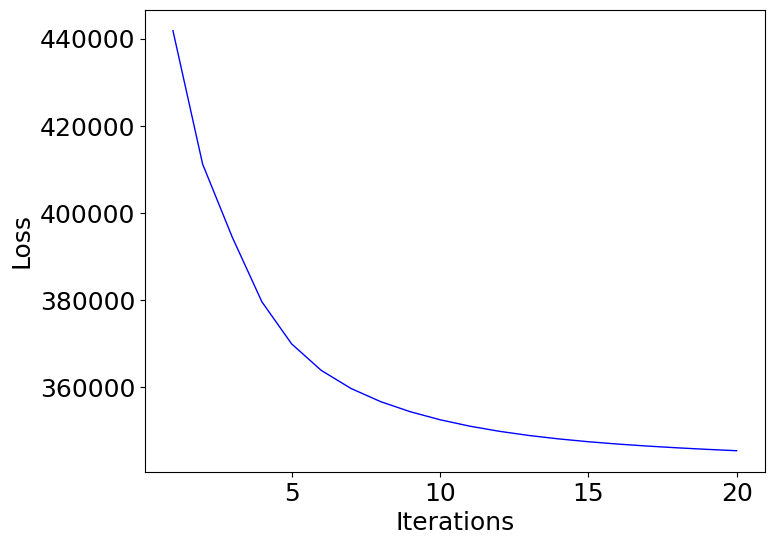

In [15]:
als_25m_data.plot_training_loss_only(losses,xaxis = "Iterations" , yaxis= "Loss", fig_name="b+e_only_125m_loss_train")

## Recommendation for new user

In [16]:
als_25m_data.create_dummy_user(2116, 5)

movies_dir = '../data/ml-25m/movies.csv'
als_25m_data.recommendation_for_new_user(movies_dir, lambd=0.1, gamma=0.001)


You may also like:['Buzzard (2015)', 'The Green Elephant (1999)', 'Fateful Findings (2013)', 'My Mistress (2014)', 'Hellraiser: Judgment (2018)', 'Antares (2004)', 'Muck (2015)', 'Nomad (Köshpendiler) (2005)', "Monty Python's Fliegender Zirkus (1971)", 'Adventures of Picasso, The (Picassos äventyr) (1978)']


# Describe and show how you chose the “best” number of latent dimensions for your model, and at which point you achieved diminishing returns

In [3]:
latents_dimensions = np.arange(1,15) 



In [ ]:
data_dir = '../data/ml-25m/ratings.csv'
best_test_rmses = []
for latent_dimension in latents_dimensions :

    als_100k_data = AlternatingLeastSquare(data_dir, embedding_dim=latent_dimension)

    als_100k_data.train_test_split()
    _, _, _, _, _, rmses_test= als_100k_data.alternating_least_square(als_100k_data .data_by_user_train, als_100k_data.data_by_movie_train, lambd=0.1, gamma=0.001, epochs = 100)
    best_test_rmses.append(min(rmses_test))


Training:  95%|█████████▌| 95/100 [3:32:15<11:10, 134.05s/epoch, test_rmse=0.865]  


## Test RMSEs Evolution with number of latents dimensions

In [45]:
import matplotlib.pyplot as plt



Text(0, 0.5, 'Test Rmses')

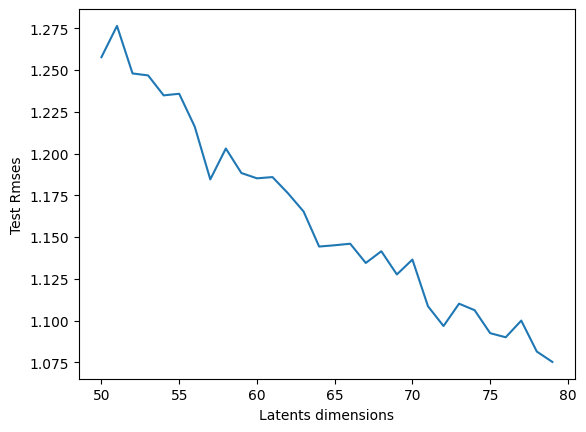

In [46]:
plt.plot(latents_dimensions, best_test_rmses)
plt.xlabel("Latents dimensions")
plt.ylabel("Test Rmses")

In [22]:
pd.DataFrame(als_25m_data.users_latents).to_csv("users_latents.csv")

In [23]:
pd.DataFrame(als_25m_data.items_latents).to_csv("items_latents.csv")

In [26]:
user_biases.tofile('users_biases.csv', sep = ',')

In [27]:
item_biases.tofile('item_biases.csv', sep = ',')